In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
warnings.filterwarnings('ignore')

In [8]:
k = np.arange(5).reshape((5, 1))
n = np.arange(5)
k*n

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [9]:
# implement dft
def dft(x: np.ndarray) -> np.ndarray:
    N = x.shape[0]
    n = np.arange(N)
    k = np.arange(N).reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return np.dot(W, x)

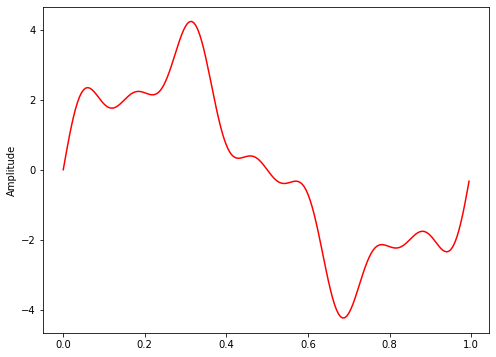

In [10]:
# sampling rate
sr = 200

# sampling interval
ts = 1.0/sr

# time vector
t = np.arange(0, 1, ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

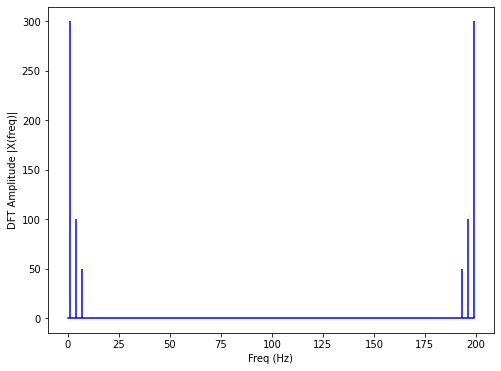

In [11]:
X = dft(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

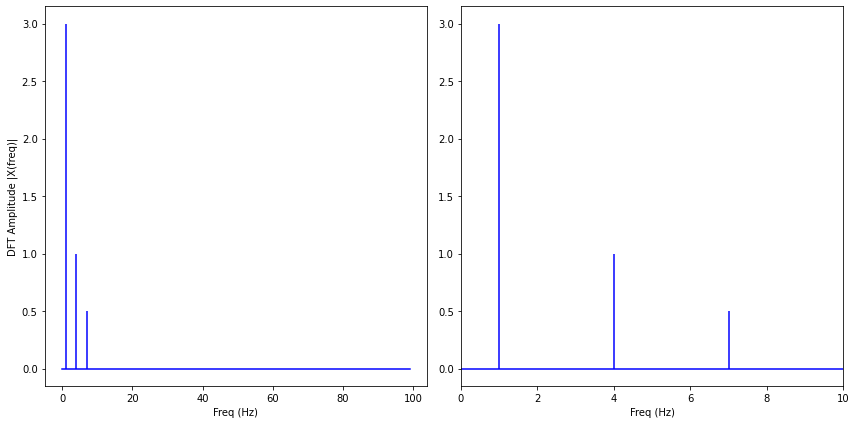

In [12]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()